Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex

%matplotlib inline

# Carregamento de dados

In [2]:
dataOri = pd.read_excel('Global_Superstore2.xlsx', index_col=0, comment='#') 
dataset = dataOri #pd.read_excel('Global_Superstore2.xlsx', index_col=0, comment='#') 

In [3]:
# Assim, quando se mexe no dataset original, e se quer voltar atrás, temos o dataOri :)
data = dataOri
if data['Profit'].isnull().sum() > 0:
    data = data[data['Profit'].notna()]
    

# Exploração dos dados



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51200 entries, 32298 to 6147
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51200 non-null  object 
 1   Order Date      51200 non-null  object 
 2   Ship Date       51200 non-null  object 
 3   Ship Mode       51200 non-null  object 
 4   Customer ID     51200 non-null  object 
 5   Customer Name   51200 non-null  object 
 6   Segment         51200 non-null  object 
 7   City            51200 non-null  object 
 8   State           51200 non-null  object 
 9   Country         51200 non-null  object 
 10  Postal Code     9904 non-null   float64
 11  Market          51200 non-null  object 
 12  Region          51200 non-null  object 
 13  Product ID      51200 non-null  object 
 14  Category        51200 non-null  object 
 15  Sub-Category    51200 non-null  object 
 16  Product Name    51200 non-null  object 
 17  Sales           51200 non-nu

In [5]:
data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Market'] = data['Market'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
#data['Orde rPriority'] = data['Order Priority'].astype('category')

C:\Users\Diogo\AppData\Local\Temp\ipykernel_12528\246431339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ship Mode'] = data['Ship Mode'].astype('category')
C:\Users\Diogo\AppData\Local\Temp\ipykernel_12528\246431339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Segment'] = data['Segment'].astype('category')
C:\Users\Diogo\AppData\Local\Temp\ipykernel_12528\246431339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Por esta análise, temos 51290 entradas, sendo que apenas 51200 tem o nosso target.

Também podemos ver que temos alguns dados repetidos, por exemplo "customer id" e "customer name". 

In [6]:
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9904.000000,51200.000000,51200.000000,51200.000000,51200.000000,51200.000000
mean,55169.201838,246.865006,3.476426,0.143026,28.639338,26.416522
std,32067.320530,487.908698,2.278923,0.212409,174.491125,57.338685
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,23223.000000,30.880000,2.000000,0.000000,0.000000,2.620000
50%,56301.000000,85.273800,3.000000,0.000000,9.255100,7.810000
75%,90008.000000,251.640000,5.000000,0.200000,36.841500,24.530000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


Pela tabela anterior podemos concluir que temos falta de dados do tipo "Postal code". E, visto que esta coluna retrata a mesma informação que as colunas "City" e "Country", é lógico removermos esta informação na parte de tratamento de dados.  

Todas as colunas tem regiões muito diferentes, logo é preciso normalizá-las, porque quantidade varia entre 1 e 14, e sales entre 0.44 e 22638.


In [8]:
data.nunique() # count number od distinct elements in specified axis. Can ignore NaN values

Order ID          25010
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10275
Category              3
Sub-Category         17
Product Name       3771
Sales             22967
Quantity             14
Discount             27
Profit            24523
Shipping Cost     10037
Order Priority        4
dtype: int64

O product id e a category/sub-category devem estar muito relacionadas, escolher qual é a melhor.


In [9]:
# Não percebi <- Diogo

columns = data.columns
for i in columns:
    if not ( len(data[i].unique()) == len(data) ) :  # se o número de order id,.... unicos não é igual ao número de rows do dataset, então há repetidos
        print(i)

Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [10]:
# Análise de colunas com valores nulos
print("Total de valores nulos ")
print(data.isnull().sum())

#print("\nTotal de valores NaN ")
#print(data.isna().sum())

Total de valores nulos 
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Como temos muitos códigos postais ausentes, e essa informação é redundante com as colunas de cidade, estado, e país, podemos removê-la.



In [11]:
# Rows without Product name
data_with_no_Product_Name = data[data['Product Name'].isnull()]
print("How many entrances without Product name? ", len(data_with_no_Product_Name.index))
print("Those, how many don't have the profit column as well? ", data_with_no_Product_Name['Profit'].isnull().sum())

# Rows without Profit
data_with_no_profit = data[data['Profit'].isnull()]
#print(data_with_no_profit)
print("Total number of columns without profit: ", len(data_with_no_profit.index))
print("Those, how many are from US? ",data_with_no_profit['Country'].str.contains("United States").size)
#print("Number of columns without profit: ",data_with_no_profit['Sub-Category'].str.contains("Art").contains("Envelopes"))
print("From the columns without profit, how many are related to Art or Envelopes? ", len(data_with_no_profit.set_index('Sub-Category').filter(regex='(Art)|(Envelopes)', axis=0).index))

How many entrances without Product name?  0
Those, how many don't have the profit column as well?  0
Total number of columns without profit:  0
Those, how many are from US?  0
From the columns without profit, how many are related to Art or Envelopes?  0


Logo, podemos concluir que todas as colunas que não tem a informação "Product name" também não tem informação sobre o lucro.
Outra informação interessante é que todas as colunas que não tem "profit" registado são dos USA, e estão relacionadas com Artes ou Envelopes.

Logo, como não temos a coluna "profit", podemos remover essas entradas da base de dados.

Perguntar a um professor se esta informação é relevante.


### Análise visual

Coluna:  Ship Mode


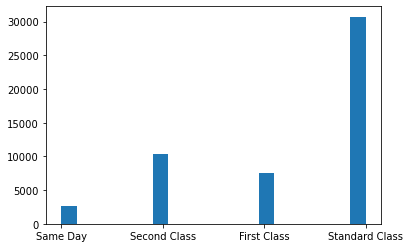

Coluna:  Segment


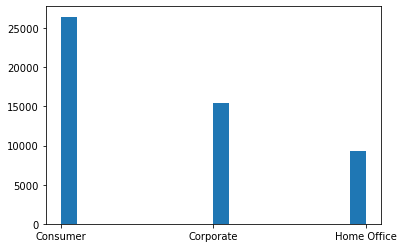

Coluna:  Market


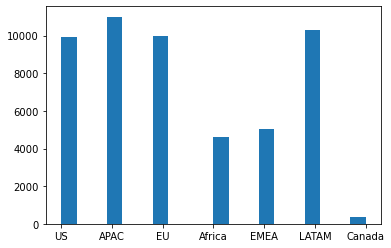

Coluna:  Category


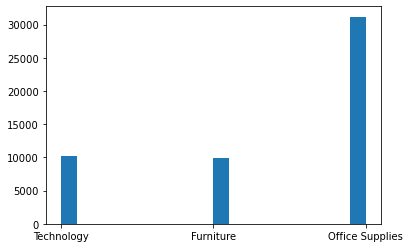

Coluna:  Order Priority


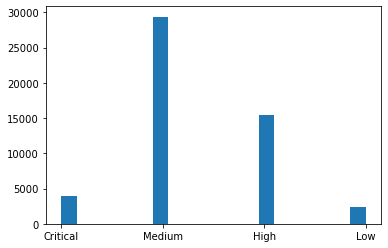

In [12]:
#Histograma com colunas com menos de 10 elementos.
plt.show()
for coluna in data.select_dtypes(exclude=["number","bool_"]).columns:
    if data[coluna].nunique() < 10:
        print("Coluna: ", coluna)
        #print(data[coluna])
        plt.hist(data[coluna].dropna(), bins = 20)
        plt.show()

Pela análise dos gráficos, podemos concluir que os dados não estão bem distribuídos, mas a informação que possuem pode ajudar na previsão dos modelos.

In [13]:
# Análise de percentagens
def show_frequencies_categorys():
    for coluna in data.select_dtypes(exclude=["number","bool_", "float64"]).columns:
        #print(coluna)
        if data[coluna].nunique() > 10 and ("Date" not in coluna) and ("ID" not in coluna):

            
            #df2=data.groupby([coluna])[coluna].sum().rename("Courses_fee").groupby(level = 0).transform(lambda x: x/x.sum())
            coluna_percentagens = (data[coluna].value_counts()/data[coluna].count())*100
           # print(coluna_percentagens)
           # print("Exp:")
            values = coluna_percentagens.groupby(coluna_percentagens > 1).filter(lambda x: x.mean() > 1)
            if values.size > 0:
                print("\n", coluna, "'s com mais de 1% de valores\n")
                print(values)
show_frequencies_categorys()


 City 's com mais de 1% de valores

New York City    1.771484
Los Angeles      1.455078
Philadelphia     1.041016
Name: City, dtype: float64

 State 's com mais de 1% de valores

California                3.865234
England                   2.927734
New York                  2.187500
Ile-de-France             1.916016
Texas                     1.906250
New South Wales           1.525391
North Rhine-Westphalia    1.404297
Queensland                1.400391
San Salvador              1.201172
National Capital          1.138672
Pennsylvania              1.138672
Name: State, dtype: float64

 Country 's com mais de 1% de valores

United States         19.343750
Australia              5.541016
France                 5.521484
Mexico                 5.164062
Germany                4.033203
China                  3.671875
United Kingdom         3.189453
Brazil                 3.123047
India                  3.037109
Indonesia              2.714844
Turkey                 2.691406
Italy          

> Acho que para evitarmos overfitting, tudo o que é menos de 1% é para juntar. Porque assim, ele pode começar a decorar, o que não faz sentido. Escolher percentagem, também. Se calhar confirmamos com um professor?

Como podemos ver, são poucas as categorias que possuem elementos com mais de 1%, logo, os dados são bastante dispersos.


Coluna:  Postal Code


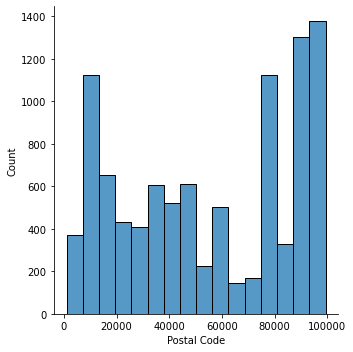


Coluna:  Sales


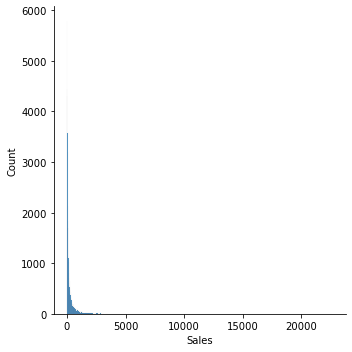


Coluna:  Quantity


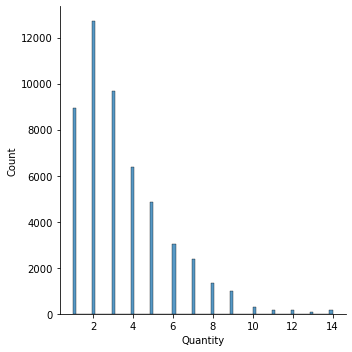


Coluna:  Discount


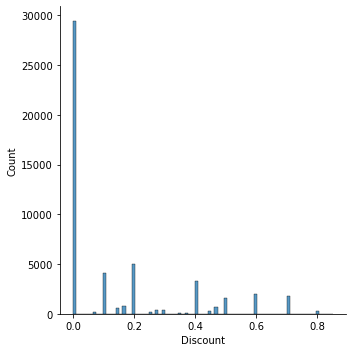


Coluna:  Profit


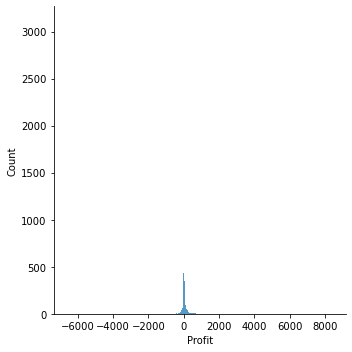


Coluna:  Shipping Cost


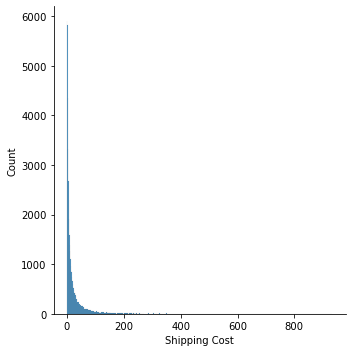

In [14]:
# Gostava de perceber o gráfico do Profit
for coluna in data.select_dtypes(include=["number","float64"]).columns:
    print("\nColuna: ", coluna)
    sns.displot(data[coluna])
    plt.show()

Analisando cada uma das colunas:
- Quantity, faz sentido juntar os que estão no máximo, a partir do 10.
- Discount, faz sentido fazer bins por regiões, tipo 0 a 0.2, 0.2 a 0.4, ... Assim não perdemos muita informação.
- Profit, remover outliers, acho.
- Shipping cost, meter mais de 200 para uma categoria.

Postal code não devia ser visto assim :)

<AxesSubplot:>

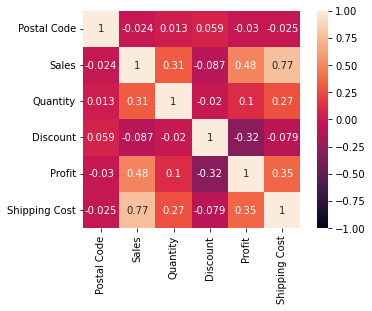

In [15]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True,annot=True)

Como podemos ver, existe bastante correlação entre o shipping cost e as sales, logo provavelmente poderemos remover uma das colunas. 
Depois de converter colunas, e converter algumas para números, talvez voltar a relacionar.

É preciso normalizar para meter na matriz? :eyes:


Coluna:  Postal Code


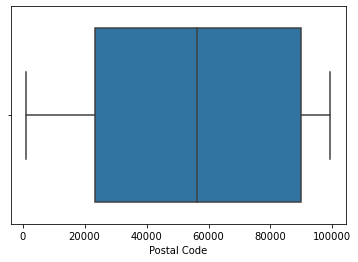


Coluna:  Sales


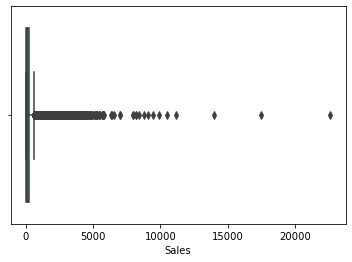


Coluna:  Quantity


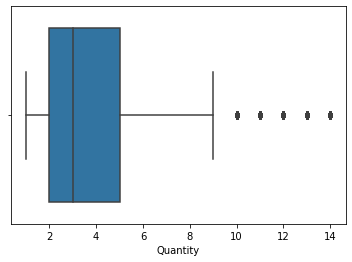


Coluna:  Discount


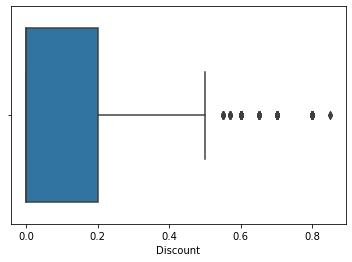


Coluna:  Profit


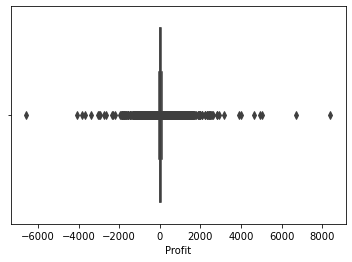


Coluna:  Shipping Cost


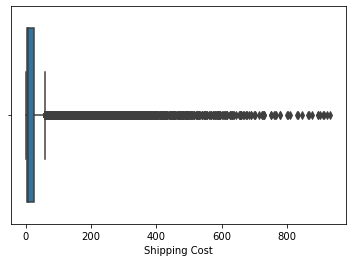

In [16]:
# Análise de dispersão de dados
for coluna in data.select_dtypes(include=["number","float64"]).columns:
    print("\nColuna: ", coluna)
    sns.boxplot(x = data[coluna])
    plt.show()



Pela análise dos gráficos:
- Postal code: É ignorar
- Sales : Ou dividimos por bins, ou removemos outilers, mas são demasiados
- Quantity remover outliers superiores
- Discount igual
- Profit, aproveitar para analisar que se calhar é normalizado
    

# Tratamento de dados - falta visualizar datas


In [17]:
#data = data.drop(columns=['Order ID', 'Customer ID', 'Customer Name', 'Product Name', 'Postal Code'])

In [18]:
#data = data.drop(['Sales'], axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51200 entries, 32298 to 6147
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Order ID        51200 non-null  object  
 1   Order Date      51200 non-null  object  
 2   Ship Date       51200 non-null  object  
 3   Ship Mode       51200 non-null  category
 4   Customer ID     51200 non-null  object  
 5   Customer Name   51200 non-null  object  
 6   Segment         51200 non-null  category
 7   City            51200 non-null  object  
 8   State           51200 non-null  object  
 9   Country         51200 non-null  category
 10  Postal Code     9904 non-null   float64 
 11  Market          51200 non-null  category
 12  Region          51200 non-null  category
 13  Product ID      51200 non-null  object  
 14  Category        51200 non-null  category
 15  Sub-Category    51200 non-null  category
 16  Product Name    51200 non-null  object  
 17  Sales    

### Corrigindo nome de parâmetros, e removendo valores nulos

In [20]:
# Já está justificado em cima o porquê de removermos Códigos postais.
if 'Postal Code' in data.columns:
    data = data.drop('Postal Code', axis=1)

# Remover linhas cujo objetivo é desconhecido, consequentemente removemos outros valores nulos.
if data['Profit'].isnull().sum() > 0:
    data = data[data['Profit'].notna()]
    

data = data.rename(columns = {'Shipping Cost':'Shipping_Cost'})
data = data.rename(columns = {'Order Priority':'Order_Priority'})
'''
median_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
most_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data.Quantity = median_imputer.fit_transform(data[['Quantity']])
data.Discount = median_imputer.fit_transform(data[['Discount']])
data.Profit = median_imputer.fit_transform(data[['Profit']])
data.Shipping_Cost = median_imputer.fit_transform(data[['Shipping_Cost']])

# Decidimos substituir pela mediana pela distribuição desta variável.
data.Sales = median_imputer.fit_transform(data[['Sales']])
'''
#data['Product Name'] = data['Product Name'].mode().iloc[0]
#data.Order_Priority = most_imputer2.fit_transform(data[['Order_Priority']])

print("Total de valores nulos ")
print(data.isnull().sum())


Total de valores nulos 
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
dtype: int64


In [21]:
# Tenho de ver com a Murta se está correto, já estava em comentário, acho, mas não tenho a certeza.

"""
c = ['Quantity','Discount','Shipping_Cost']
for column in c:
    outliers = []
# def detect_outliers_iqr(dataset):
    #dataset[column] = sorted(dataset[column])
    Q1 = dataset[column].quantile[0.25]
    Q2 = dataset[column].quantile[0.75]
    #q1 = np.percentile(dataset[column], 25)
    #q3 = np.percentile(dataset[column], 75)
    # print(q1, q3)
    IQR = Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    print("Outliers: ", outliers)
"""

'\nc = [\'Quantity\',\'Discount\',\'Shipping_Cost\']\nfor column in c:\n    outliers = []\n# def detect_outliers_iqr(dataset):\n    #dataset[column] = sorted(dataset[column])\n    Q1 = dataset[column].quantile[0.25]\n    Q2 = dataset[column].quantile[0.75]\n    #q1 = np.percentile(dataset[column], 25)\n    #q3 = np.percentile(dataset[column], 75)\n    # print(q1, q3)\n    IQR = Q3-Q1\n    lwr_bound = Q1-(1.5*IQR)\n    upr_bound = Q3+(1.5*IQR)\n    # print(lwr_bound, upr_bound)\n    for i in data: \n        if (i<lwr_bound or i>upr_bound):\n            outliers.append(i)\n    print("Outliers: ", outliers)\n'

In [22]:
# Juntar países e cidades cuja frequência é menor que uma especificada, para dados categóricos
# Esses dados são: "State", "City", "Country", "Market", "Region"
#show_frequencies_categorys()
percentage = 1

data3 = data
for coluna in ["State", "City", "Country", "Market", "Region" ]:

        #print(coluna)
        series = data3.value_counts(data3[coluna])
        mask = (series/series.sum() * 100).lt(percentage)
        #print(mask,"\n\n")
        data3[coluna] = np.where(data3[coluna].isin(series[mask].index),'Other',data3[coluna])

data = data3
show_frequencies_categorys()


 State 's com mais de 1% de valores

Other                     79.388672
California                 3.865234
England                    2.927734
New York                   2.187500
Ile-de-France              1.916016
Texas                      1.906250
New South Wales            1.525391
North Rhine-Westphalia     1.404297
Queensland                 1.400391
San Salvador               1.201172
Pennsylvania               1.138672
National Capital           1.138672
Name: State, dtype: float64

 Country 's com mais de 1% de valores

Other                 24.707031
United States         19.343750
Australia              5.541016
France                 5.521484
Mexico                 5.164062
Germany                4.033203
China                  3.671875
United Kingdom         3.189453
Brazil                 3.123047
India                  3.037109
Indonesia              2.714844
Turkey                 2.691406
Italy                  2.164062
Nigeria                1.767578
Spain         

In [23]:
data4 = data
number_bins = 6

from pandas.api.types import is_numeric_dtype
if is_numeric_dtype(data4['Discount']):
    # Bins in discount
    print("0 ", data4['Discount'])
    min_value = data4['Discount'].min()
    print("1", min_value)
    max_value = data4['Discount'].max()
    print("2", max_value)
    limits_bins = np.linspace(min_value,max_value , num=number_bins)
    print("3", limits_bins)
    labels_names = []
    for i in range(0, len(limits_bins) - 1):
#    print("Olá")   
        v1 = '{:.2f}'.format(limits_bins[i])
        v2 = '{:.2f}'.format(limits_bins[i+1])
        labels_names.append(f'{v1}-{v2}')
    #print("v1: ", limits_bins[i])
    #print("v2: ", limits_bins[i+1])
    #print("----")
#    data4.loc[data4['score'].between(0, 50, 'both'), 'grade'] = 'C'
#print(labels_names)
    data4['Discount'] = pd.cut(x = data4['Discount'], bins = limits_bins, labels = labels_names, include_lowest = True)
    print(data4)
data = data4

0  Row ID
32298    0.0
26341    0.1
25330    0.1
13524    0.1
47221    0.0
        ... 
24175    0.1
29002    0.0
35398    0.8
9596     0.0
6147     0.0
Name: Discount, Length: 51200, dtype: float64
1 0.0
2 0.85
3 [0.   0.17 0.34 0.51 0.68 0.85]
               Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                        
32298    CA-2012-124891  31-07-2012  31-07-2012        Same Day    RH-19495   
26341     IN-2013-77878  05-02-2013  07-02-2013    Second Class    JR-16210   
25330     IN-2013-71249  17-10-2013  18-10-2013     First Class    CR-12730   
13524   ES-2013-1579342  28-01-2013  30-01-2013     First Class    KM-16375   
47221      SG-2013-4320  05-11-2013  06-11-2013        Same Day     RH-9495   
...                 ...         ...         ...             ...         ...   
24175     IN-2014-57662  05-08-2014  10-08-2014  Standard Class    DB-13270   
29002     IN-2014-62366  19-06-2014  19-06-

In [24]:

# Tratar das datas
data2 = data
# Acho que se pode remover este bloco, está igual lá para baixo
if "Order Date" in data2:
    consider_year = True
    consider_month = True
    consider_day = True
else: 
    consider_year = False
    consider_month = False
    consider_day = False
    
# Converter datas, acho que já está feito em cima, depois confirmar
dates_order = DatetimeIndex(pd.to_datetime(data2['Order Date'],format='%d-%m-%Y', errors='coerce'))
dates_ship = DatetimeIndex(pd.to_datetime(data2['Ship Date'],format='%d-%m-%Y', errors='coerce'))
if consider_year : 
    data2['Year_order'] = dates_order.year
    data2['Year_ship'] = dates_ship.year
    
if consider_month : 
    data2['Month_order'] = dates_order.month
    data2['Month_ship'] = dates_ship.month

if consider_day : 
    data2['Day_order'] = dates_order.day
    data2['Day_ship'] = dates_ship.day
if 'Order Date' in data2:
    data2 = data2.drop(['Order Date', 'Ship Date'], axis=1)

data = data2

In [25]:
# Label encoding de algumas variáveis
from sklearn.preprocessing import LabelEncoder

if "Category" in data2:
    process_Product_ID = True
    process_Costumer_ID = True
    process_Category = True
    process_Sub_Category = True
    process_Discount = True
else: 
    process_Product_ID = False
    process_Costumer_ID = False
    process_Category = False
    process_Sub_Category = False
    process_Discount = False

lb_make = LabelEncoder()

if process_Product_ID:
    data2["Product ID LabelEnc"] = lb_make.fit_transform(data2["Product ID"])

if process_Costumer_ID:
    data2["Costumer ID LabelEnc"] = lb_make.fit_transform(data2["Customer ID"])

if process_Category:
    data2["Category LabelEnc"] = lb_make.fit_transform(data2["Category"])

if process_Sub_Category:
    data2["Sub-Category LabelEnc"] = lb_make.fit_transform(data2["Sub-Category"])
if process_Discount:
    data2["Discount LabelEnc"] = lb_make.fit_transform(data2["Discount"])

    
if process_Product_ID: 
    data2 = data2.drop(['Product ID', 'Customer ID', "Category", "Sub-Category", "Discount"], axis=1)
#from pandas.api.types import is_string_dtype

if data2['Ship Mode'].dtype == 'category' or data2['Ship Mode'].dtype == 'object':
   # print("Ship mode ainda está em categorias")
    #print(data2['Ship Mode'].unique())
    ship_mode_dic = {'Same Day':1, 'First Class':2, 'Second Class':3,'Standard Class':4}
    #dataTemp = pd.DataFrame({"Ship Mode": ship_mode_dic.keys()})
    #print("Aqui vai\n")
    data2["Ship Mode"]= data2["Ship Mode"].apply(lambda x: ship_mode_dic.get(x))
    #print(data2)

if "Order_Priority" in data2 and (data2['Order_Priority'].dtype == 'category' or data2['Order_Priority'].dtype == 'object'):
    dataTemp = data2
    # print("Ship mode ainda está em categorias")
    #print(dataTemp['Order_Priority'].unique())
    priorities_dic = {'Critical':1, 'High':2, 'Medium':3,'Low':4}
    #dataTemp = pd.DataFrame({"Order_Priority": priorities_dic.keys()})
    #print("Aqui vai\n")
    dataTemp["Order_Priority"]= dataTemp["Order_Priority"].apply(lambda x: priorities_dic.get(x))
    #print(dataTemp.info())
    data2 = dataTemp
    
print("\nApós fazer Label Encoding")
print(data2)



Após fazer Label Encoding
               Order ID Ship Mode      Customer Name      Segment  \
Row ID                                                              
32298    CA-2012-124891         1        Rick Hansen     Consumer   
26341     IN-2013-77878         3      Justin Ritter    Corporate   
25330     IN-2013-71249         2       Craig Reiter     Consumer   
13524   ES-2013-1579342         2   Katherine Murray  Home Office   
47221      SG-2013-4320         1        Rick Hansen     Consumer   
...                 ...       ...                ...          ...   
24175     IN-2014-57662         4  Deborah Brumfield  Home Office   
29002     IN-2014-62366         1    Katrina Edelman    Corporate   
35398    US-2014-102288         4   Zuschuss Carroll     Consumer   
9596     MX-2012-140767         4         Ross Baird  Home Office   
6147     MX-2012-134460         3      Mick Crebagga     Consumer   

                 City            State        Country  Market      Region  

# Coisas que faltam:
- Visualizar datas
- Arranjar o Order_Priority, não percebo como é que desapareceu, mas vou conseguir :)

# Modelação


In [26]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


### O target é o profit. Depois remover colunas de ID's


In [27]:
#dataset = dataset.drop(columns=['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code'])

In [28]:
#dataset.reset_index(drop=True)
#dataset1 = pd.read_excel('Global_Superstore2.xlsx', index_col=0, comment='#') 
dataset = dataset.drop(columns=['Quantity', 'Discount', 'Shipping Cost', 'Sales'])
#print(dataset)

y = dataset['Profit']
print(dataset.info())
X = dataset.drop(['Profit', 'Order ID', 'Customer Name', 'Product Name','Postal Code', 'Region', 'City' ], axis=1)

#print(X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51251 non-null  object 
 17  Profit          51200 non-nu

In [29]:
from sklearn.model_selection import train_test_split

# Para testar, falta corrigir estas categorias:
if 'Order Priority' in X:
    X = X.drop(['Order Priority', 'Market', "Country", "State", "Segment", "Ship Mode"], axis=1)

    



In [30]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
clf = DecisionTreeClassifier(random_state=2021)


#X_train1 = X_train[X_train.isna().any(axis=1)]
"""

#Acho que podemos converter os mais importantes para one-hot enconding ou algo do género. Depois continuo
print("Será que há Na\n")
count = np.isnan(X_train).values.sum()
count = np.isnan(X_train).any()
print("\nX -> It contains " + str(count) + " nan values\n")
count = np.isnan(y_train).values.sum()
print("Y -> It contains " + str(count) + " nan values")
print("Será que há Inf")

count = np.isinf(X_train).values.sum()
print("X -> It contains " + str(count) + " infinite values")
count = np.isinf(y_train).values.sum()
print("Y -> It contains " + str(count) + " infinite values")

print(X.info())
print(y.info())
"""
# Para este
y_train = y_train.astype(int)
y_train_transformed = lb_make.fit_transform(y_train)

# Análise de variáveis que são do tipo float, para descobrir se é necessário multiplicar para não se perder informação na conversão para int.





X_train_transformed = {}
for coisa in X_train:
    #print(X_train[coisa])
    X_train_transformed[coisa] = lb_make.fit_transform(X_train[coisa]) 
# X_train_transformed = lb_make.fit_transform(X_train)


#X_train = X_train.filter(['Quantity'])

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


#scores = cross_val_score(clf, X, y, cv=5)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# Métricas
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions, squared=True))
print(mean_squared_error(y_test, predictions, squared=True))

In [ ]:
### Regressão linear


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
predictions = lm.predict(X_test)
sns.distplot((y_test - predictions), bins=4)

In [ ]:
from sklearn import metrics

print ('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print ('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


### Neurónios


In [ ]:
dataset_MLP = dataset.drop(columns=['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code'])
dataset_MLP = dataset_MLP.drop(['Order Priority', 'Market', "City", "Segment", "Ship Mode", "Ship Date"], axis=1)
print(dataset_MLP.info())

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print("Tensorflow version:", tf.__version__)





In [ ]:
X_MLP = dataset_MLP.drop('Profit', axis=1)
y_MLP = dataset_MLP[['Profit']]
print(X_MLP.info())

# Convert data
if "Order Date" in X_MLP:
    consider_year = True
    consider_month = True
    consider_day = True
else: 
    consider_year = False
    consider_month = False
    consider_day = False
    
# Converter datas 
dates_order = DatetimeIndex(pd.to_datetime(X_MLP['Order Date'],format='%d-%m-%Y', errors='coerce'))
if consider_year : 
    X_MLP['Year_order'] = dates_order.year
    
if consider_month : 
    X_MLP['Month_order'] = dates_order.month
    
if consider_day : 
    X_MLP['Day_order'] = dates_order.day
    
if 'Order Date' in X_MLP:
    X_MLP = X_MLP.drop(['Order Date'], axis=1)
#print(X)
# Convert ID's to Label encoding
from sklearn.preprocessing import LabelEncoder

if "State" in X_MLP:
    list_to_process = ["State", "Country", "Region", "Category", "Sub-Category"]

lb_make = LabelEncoder()

if list_to_process:
    for column in list_to_process:
        X_MLP[column] = lb_make.fit_transform(X_MLP[column]) 



scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X_MLP)

scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_MLP)

X_scaled = pd.DataFrame(scaler_X.transform(X_MLP[X_MLP.columns]), columns=X_MLP.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y_MLP[y_MLP.columns]), columns=y_MLP.columns)



In [ ]:
X_scaled=X_scaled.dropna().reset_index(drop=True)
y_scaled=y_scaled.dropna().reset_index(drop=True)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=RANDOM_SEED)

number_columns = len(X_scaled.columns)#.count()
#print("Número de colunas: ", number_columns)

def build_model(activation='relu', learning_rate=0.01):
#create a sequential model (with three Layers - Last one is the output)
    model = Sequential()
    model.add(Dense(number_columns, input_dim=number_columns, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(1, activation='relu'))
  
     #compile the model
    #Define the Loss function, the otimizer and metrics to be used
    model. compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    return model

model = build_model()
model.summary()
TUNING_DICT = {
    'activation' : ['relu', 'sigmoid'],
    'learning_rate' : [0.01, 0.001]
}

kf = KFold(n_splits=2, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=15,batch_size=number_columns)
grid_search = GridSearchCV(estimator = model,
                            param_grid = TUNING_DICT,
                            cv = kf,
                            scoring = 'neg_mean_absolute_error',
                            refit ='True',
                            verbose = 1)

grid_search.fit(X_train, y_train, validation_split=0.2)

"""
def BuildModel():
     model = Sequential()
     model.add(Dense(128, input_dim=12,activation='relu')) 
     model.add(Dense(32, activation='relu')) 
     model.add(Dense(8,activation='relu')) 
     model.add(Dense(1,activation='linear'))
     model.compile(loss="mean_squared_error", optimizer="adam")   
     return model

BuildModel().summary()

regressor = KerasRegressor(build_fn=BuildModel,epochs=20,batch_size=12)
print(X_scaled)
print(y_scaled)
regressor.fit(X_scaled,y_scaled) 

y_pred = regressor.predict(X_scaled)
 

mse_krr = mean_squared_error(y_scaled, y_pred)

"""

In [ ]:
# Overfitting analisys

#Our best model (remember we set refit
best_mlp_model = grid_search.best_estimator_

from livelossplot import PlotLossesKerasTF
best_mlp_model.fit(X_train, y_train, epochs=20,
validation_data=(X_test, y_test),
callbacks=[PlotLossesKerasTF()], verbose=1)

 



In [ ]:
 #0btain predictions

predictions = best_mlp_model.predict(X_test)

predictions = predictions.reshape(predictions.shape[0], 1)
predicions_unscaled = scaler_y.inverse_transform(predictions)
predicions_unscaled[:5]


In [ ]:
y_test_unscaled = scaler_y.inverse_transform(y_test)

#Visualising the actual and predicted result
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit], color = 'green', label = 'Actual')
    plt.plot (predicions_unscaled[:limit], color = 'red', label = 'Predicted')
    plt.grid(alpha = 0.3)
    plt.xlabel('I don`t know')
    plt.ylabel ('Profit')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

#let's Limit to 200 comparisions for better visualization
real_predicted_viz(200)


In [ ]:

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
